In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

from scipy import stats


In [2]:
read_data = pd.read_csv("AviationData.csv", encoding='ISO-8859-1', low_memory=False)
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

In [3]:
data = pd.DataFrame(read_data[["Event.Date", "Location", "Country", "Make", "Amateur.Built", "Number.of.Engines", 
                               "Engine.Type", "Injury.Severity","Total.Fatal.Injuries",  "Weather.Condition", 
                               "Broad.phase.of.flight","Investigation.Type","Aircraft.Category"]])
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             87282 non-null  object 
 1   Location               87230 non-null  object 
 2   Country                87056 non-null  object 
 3   Make                   87219 non-null  object 
 4   Amateur.Built          87180 non-null  object 
 5   Number.of.Engines      81533 non-null  float64
 6   Engine.Type            81391 non-null  object 
 7   Injury.Severity        86399 non-null  object 
 8   Total.Fatal.Injuries   75881 non-null  float64
 9   Weather.Condition      83304 non-null  object 
 10  Broad.phase.of.flight  61724 non-null  object 
 11  Investigation.Type     87282 non-null  object 
 12  Aircraft.Category      30783 non-null  object 
dtypes: float64(2), object(11)
memory usage: 8.7+ MB


,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,No,1.0,Reciprocating,Fatal(2),2.0,UNK,Cruise,Accident,NaN
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,No,1.0,Reciprocating,Fatal(4),4.0,UNK,Unknown,Accident,NaN
2,1974-08-30,"Saltville, VA",United States,Cessna,No,1.0,Reciprocating,Fatal(3),3.0,IMC,Cruise,Accident,NaN
3,1977-06-19,"EUREKA, CA",United States,Rockwell,No,1.0,Reciprocating,Fatal(2),2.0,IMC,Cruise,Accident,NaN
4,1979-08-02,"Canton, OH",United States,Cessna,No,NaN,NaN,Fatal(1),1.0,VMC,Approach,Accident,NaN
5,1979-09-17,"BOSTON, MA",United States,Mcdonnell Douglas,No,2.0,Turbo Fan,Non-Fatal,NaN,VMC,Climb,Accident,Airplane
6,1981-08-01,"COTTON, MN",United States,Cessna,No,1.0,Reciprocating,Fatal(4),4.0,IMC,Unknown,Accident,NaN
7,1982-01-01,"PULLMAN, WA",United States,Cessna,No,1.0,Reciprocating,Non-Fatal,0.0,VMC,Takeoff,Accident,Airplane
8,1982-01-01,"EAST HANOVER, NJ",United States,Cessna,No,2.0,Reciprocating,Non-Fatal,0.0,IMC,Landing,Accident,Airplane
9,1982-01-01,"JACKSONVILLE, FL",United States,North American,No,1.0,Reciprocating,Non-Fatal,0.0,IMC,Cruise,Accident,NaN


In [4]:
print("Number of levels:", len(data["Amateur.Built"].unique())) 
print(data["Amateur.Built"].value_counts())

Number of levels: 5
No     58165
N      20661
Yes     5646
Y       2708
Name: Amateur.Built, dtype: int64


##### Data cleaning

In [5]:
data_clean=pd.DataFrame(data)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             87282 non-null  object 
 1   Location               87230 non-null  object 
 2   Country                87056 non-null  object 
 3   Make                   87219 non-null  object 
 4   Amateur.Built          87180 non-null  object 
 5   Number.of.Engines      81533 non-null  float64
 6   Engine.Type            81391 non-null  object 
 7   Injury.Severity        86399 non-null  object 
 8   Total.Fatal.Injuries   75881 non-null  float64
 9   Weather.Condition      83304 non-null  object 
 10  Broad.phase.of.flight  61724 non-null  object 
 11  Investigation.Type     87282 non-null  object 
 12  Aircraft.Category      30783 non-null  object 
dtypes: float64(2), object(11)
memory usage: 8.7+ MB


In [6]:
data_clean = data_clean[data_clean['Investigation.Type']=='Accident']
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83536 entries, 0 to 87281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             83536 non-null  object 
 1   Location               83496 non-null  object 
 2   Country                83330 non-null  object 
 3   Make                   83500 non-null  object 
 4   Amateur.Built          83478 non-null  object 
 5   Number.of.Engines      78874 non-null  float64
 6   Engine.Type            78753 non-null  object 
 7   Injury.Severity        83258 non-null  object 
 8   Total.Fatal.Injuries   72780 non-null  float64
 9   Weather.Condition      80791 non-null  object 
 10  Broad.phase.of.flight  59806 non-null  object 
 11  Investigation.Type     83536 non-null  object 
 12  Aircraft.Category      29123 non-null  object 
dtypes: float64(2), object(11)
memory usage: 8.9+ MB


In [7]:
for col in data_clean:
    data_clean[col].replace('', np.nan, inplace=True)

In [8]:
#data_clean['Number.of.Engines'].replace('', np.nan, inplace=True)
data_clean.dropna(subset=['Number.of.Engines'], inplace=True)
data_clean.info()
data_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78874 entries, 0 to 87281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             78874 non-null  object 
 1   Location               78853 non-null  object 
 2   Country                78674 non-null  object 
 3   Make                   78860 non-null  object 
 4   Amateur.Built          78859 non-null  object 
 5   Number.of.Engines      78874 non-null  float64
 6   Engine.Type            76879 non-null  object 
 7   Injury.Severity        78812 non-null  object 
 8   Total.Fatal.Injuries   68642 non-null  float64
 9   Weather.Condition      77862 non-null  object 
 10  Broad.phase.of.flight  58939 non-null  object 
 11  Investigation.Type     78874 non-null  object 
 12  Aircraft.Category      26624 non-null  object 
dtypes: float64(2), object(11)
memory usage: 8.4+ MB


,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,No,1.0,Reciprocating,Fatal(2),2.0,UNK,Cruise,Accident,NaN
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,No,1.0,Reciprocating,Fatal(4),4.0,UNK,Unknown,Accident,NaN
2,1974-08-30,"Saltville, VA",United States,Cessna,No,1.0,Reciprocating,Fatal(3),3.0,IMC,Cruise,Accident,NaN
3,1977-06-19,"EUREKA, CA",United States,Rockwell,No,1.0,Reciprocating,Fatal(2),2.0,IMC,Cruise,Accident,NaN
5,1979-09-17,"BOSTON, MA",United States,Mcdonnell Douglas,No,2.0,Turbo Fan,Non-Fatal,NaN,VMC,Climb,Accident,Airplane
6,1981-08-01,"COTTON, MN",United States,Cessna,No,1.0,Reciprocating,Fatal(4),4.0,IMC,Unknown,Accident,NaN
7,1982-01-01,"PULLMAN, WA",United States,Cessna,No,1.0,Reciprocating,Non-Fatal,0.0,VMC,Takeoff,Accident,Airplane
8,1982-01-01,"EAST HANOVER, NJ",United States,Cessna,No,2.0,Reciprocating,Non-Fatal,0.0,IMC,Landing,Accident,Airplane
9,1982-01-01,"JACKSONVILLE, FL",United States,North American,No,1.0,Reciprocating,Non-Fatal,0.0,IMC,Cruise,Accident,NaN
10,1982-01-01,"HOBBS, NM",United States,Piper,No,1.0,Reciprocating,Non-Fatal,0.0,VMC,Approach,Accident,NaN


In [9]:
data_clean['City'] = data_clean['Location'].str.split(',').str[0]
data_clean['State'] = data_clean['Location'].str.split(',').str[1]
data_clean.head(6)

,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category,City,State
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,No,1.0,Reciprocating,Fatal(2),2.0,UNK,Cruise,Accident,NaN,MOOSE CREEK,ID
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,No,1.0,Reciprocating,Fatal(4),4.0,UNK,Unknown,Accident,NaN,BRIDGEPORT,CA
2,1974-08-30,"Saltville, VA",United States,Cessna,No,1.0,Reciprocating,Fatal(3),3.0,IMC,Cruise,Accident,NaN,Saltville,VA
3,1977-06-19,"EUREKA, CA",United States,Rockwell,No,1.0,Reciprocating,Fatal(2),2.0,IMC,Cruise,Accident,NaN,EUREKA,CA
5,1979-09-17,"BOSTON, MA",United States,Mcdonnell Douglas,No,2.0,Turbo Fan,Non-Fatal,NaN,VMC,Climb,Accident,Airplane,BOSTON,MA
6,1981-08-01,"COTTON, MN",United States,Cessna,No,1.0,Reciprocating,Fatal(4),4.0,IMC,Unknown,Accident,NaN,COTTON,MN


In [10]:
data_clean.fillna("UNKNOWN", inplace=True)
data_clean.head(6)

,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category,City,State
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,No,1.0,Reciprocating,Fatal(2),2.0,UNK,Cruise,Accident,UNKNOWN,MOOSE CREEK,ID
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,No,1.0,Reciprocating,Fatal(4),4.0,UNK,Unknown,Accident,UNKNOWN,BRIDGEPORT,CA
2,1974-08-30,"Saltville, VA",United States,Cessna,No,1.0,Reciprocating,Fatal(3),3.0,IMC,Cruise,Accident,UNKNOWN,Saltville,VA
3,1977-06-19,"EUREKA, CA",United States,Rockwell,No,1.0,Reciprocating,Fatal(2),2.0,IMC,Cruise,Accident,UNKNOWN,EUREKA,CA
5,1979-09-17,"BOSTON, MA",United States,Mcdonnell Douglas,No,2.0,Turbo Fan,Non-Fatal,UNKNOWN,VMC,Climb,Accident,Airplane,BOSTON,MA
6,1981-08-01,"COTTON, MN",United States,Cessna,No,1.0,Reciprocating,Fatal(4),4.0,IMC,Unknown,Accident,UNKNOWN,COTTON,MN


In [11]:
data_clean['Amateur.Built'].replace('N', 'No', inplace=True)
data_clean['Amateur.Built'].replace('Y', 'Yes', inplace=True)
data_clean["Amateur.Built"].value_counts()

No         70825
Yes         8034
UNKNOWN       15
Name: Amateur.Built, dtype: int64

In [12]:
data_clean['Weather.Condition'].replace('UNK', 'UNKNOWN', inplace=True)
data_clean['Weather.Condition'].replace('Unk', 'UNKNOWN', inplace=True)
data_clean['Broad.phase.of.flight'].replace('Unknown', 'UNKNOWN', inplace=True)
data_clean['Engine.Type'].replace('Unknown', 'UNKNOWN', inplace=True)
data_clean['Aircraft.Category'].replace('Unknown', 'UNKNOWN', inplace=True)

In [13]:
data_clean['Injury.Severity'] = data_clean['Injury.Severity'].str.split('(').str[0]

In [14]:
data_clean['Event.Date'] = pd.to_datetime(data_clean['Event.Date'])
data_clean['Month'] = data_clean['Event.Date'].dt.month
data_clean['Year'] = data_clean['Event.Date'].dt.year

In [15]:
data_clean['Make'] = data_clean['Make'].str.upper()
data_clean['City'] = data_clean['City'].str.upper()
data_clean['State'] = data_clean['State'].str.upper()

In [16]:
data_clean['Number.of.Engines']= data_clean['Number.of.Engines'].astype('int64')
data_clean['Number.of.Engines'] = data_clean['Number.of.Engines'].round(0)

In [17]:
data_clean["Make"].value_counts()

CESSNA                  25594
PIPER                   14049
BEECH                    4873
BELL                     2347
MOONEY                   1265
                        ...  
DANA A. MOORE               1
SLATER                      1
EAA CHAPTER 229             1
PRUDHOMME                   1
CAMERON BALLOONS U S        1
Name: Make, Length: 7104, dtype: int64

In [18]:
data_clean["Broad.phase.of.flight"].value_counts()

UNKNOWN        20465
Landing        14782
Takeoff        12004
Cruise          9817
Maneuvering     8012
Approach        6168
Climb           1829
Taxi            1779
Descent         1732
Go-around       1336
Standing         841
Other            109
Name: Broad.phase.of.flight, dtype: int64

In [19]:
data_clean["Injury.Severity"].value_counts()

Non-Fatal      63241
Fatal          15545
UNKNOWN           62
Unavailable       26
Name: Injury.Severity, dtype: int64

In [20]:
data_clean["Aircraft.Category"].value_counts()

UNKNOWN              52254
Airplane             22905
Helicopter            2721
Glider                 408
Balloon                157
Gyrocraft              157
Weight-Shift           154
Powered Parachute       85
Ultralight              26
Blimp                    4
Powered-Lift             2
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [21]:
data_clean.info()
data_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78874 entries, 0 to 87281
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             78874 non-null  datetime64[ns]
 1   Location               78874 non-null  object        
 2   Country                78874 non-null  object        
 3   Make                   78874 non-null  object        
 4   Amateur.Built          78874 non-null  object        
 5   Number.of.Engines      78874 non-null  int64         
 6   Engine.Type            78874 non-null  object        
 7   Injury.Severity        78874 non-null  object        
 8   Total.Fatal.Injuries   78874 non-null  object        
 9   Weather.Condition      78874 non-null  object        
 10  Broad.phase.of.flight  78874 non-null  object        
 11  Investigation.Type     78874 non-null  object        
 12  Aircraft.Category      78874 non-null  object        
 13  C

,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category,City,State,Month,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,STINSON,No,1,Reciprocating,Fatal,2.0,UNKNOWN,Cruise,Accident,UNKNOWN,MOOSE CREEK,ID,10,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,PIPER,No,1,Reciprocating,Fatal,4.0,UNKNOWN,UNKNOWN,Accident,UNKNOWN,BRIDGEPORT,CA,7,1962
2,1974-08-30,"Saltville, VA",United States,CESSNA,No,1,Reciprocating,Fatal,3.0,IMC,Cruise,Accident,UNKNOWN,SALTVILLE,VA,8,1974
3,1977-06-19,"EUREKA, CA",United States,ROCKWELL,No,1,Reciprocating,Fatal,2.0,IMC,Cruise,Accident,UNKNOWN,EUREKA,CA,6,1977
5,1979-09-17,"BOSTON, MA",United States,MCDONNELL DOUGLAS,No,2,Turbo Fan,Non-Fatal,UNKNOWN,VMC,Climb,Accident,Airplane,BOSTON,MA,9,1979
6,1981-08-01,"COTTON, MN",United States,CESSNA,No,1,Reciprocating,Fatal,4.0,IMC,UNKNOWN,Accident,UNKNOWN,COTTON,MN,8,1981
7,1982-01-01,"PULLMAN, WA",United States,CESSNA,No,1,Reciprocating,Non-Fatal,0.0,VMC,Takeoff,Accident,Airplane,PULLMAN,WA,1,1982
8,1982-01-01,"EAST HANOVER, NJ",United States,CESSNA,No,2,Reciprocating,Non-Fatal,0.0,IMC,Landing,Accident,Airplane,EAST HANOVER,NJ,1,1982
9,1982-01-01,"JACKSONVILLE, FL",United States,NORTH AMERICAN,No,1,Reciprocating,Non-Fatal,0.0,IMC,Cruise,Accident,UNKNOWN,JACKSONVILLE,FL,1,1982
10,1982-01-01,"HOBBS, NM",United States,PIPER,No,1,Reciprocating,Non-Fatal,0.0,VMC,Approach,Accident,UNKNOWN,HOBBS,NM,1,1982


In [22]:
data_clean.drop(data_clean.index[data_clean['Injury.Severity'] == 'UNKNOWN'], inplace = True)
data_clean.drop(data_clean.index[data_clean['Injury.Severity'] == 'Unavailable'], inplace = True)
data_clean["Injury.Severity"].unique()

array(['Fatal', 'Non-Fatal'], dtype=object)

##### EDA

In [23]:
print("Number of Countries:", len(data_clean["Country"].unique())) 
print(data_clean["Country"].value_counts().head(10))

Number of Countries: 150
United States     76917
UNKNOWN             200
Brazil              134
Bahamas             124
Mexico               97
Canada               91
ATLANTIC OCEAN       68
Australia            64
Puerto Rico          62
France               60
Name: Country, dtype: int64


In [24]:
data1 = data_clean.loc[data_clean['Country'].isin(['United States', 'Mexico', 'Brazil', 'Canada', 'United Kingdom',
                                                  'Australia', 'UNKNOWN', 'France', 'Germany', 'Bahamas'])]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77784 entries, 0 to 87277
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             77784 non-null  datetime64[ns]
 1   Location               77784 non-null  object        
 2   Country                77784 non-null  object        
 3   Make                   77784 non-null  object        
 4   Amateur.Built          77784 non-null  object        
 5   Number.of.Engines      77784 non-null  int64         
 6   Engine.Type            77784 non-null  object        
 7   Injury.Severity        77784 non-null  object        
 8   Total.Fatal.Injuries   77784 non-null  object        
 9   Weather.Condition      77784 non-null  object        
 10  Broad.phase.of.flight  77784 non-null  object        
 11  Investigation.Type     77784 non-null  object        
 12  Aircraft.Category      77784 non-null  object        
 13  C

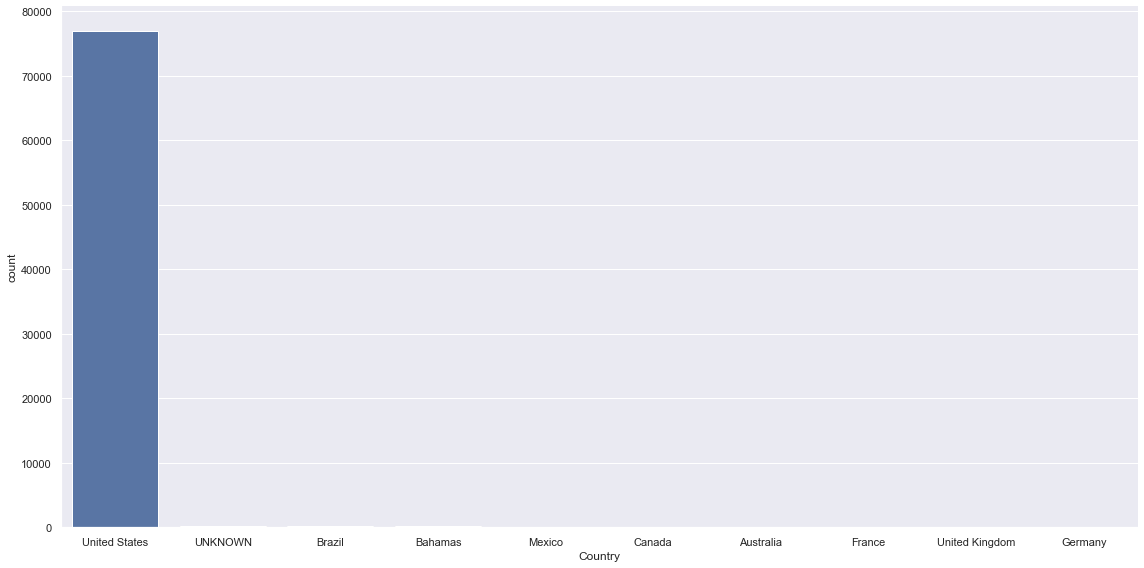

In [25]:
sb.catplot(x = "Country", data = data1, kind = "count", 
           order = data1["Country"].value_counts().index, height = 8, aspect = 2)

## States

In [26]:
data2 = data_clean.loc[data_clean['Country'].isin(['United States'])]
data2

,Event.Date,Location,Country,Make,Amateur.Built,Number.of.Engines,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Investigation.Type,Aircraft.Category,City,State,Month,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,STINSON,No,1,Reciprocating,Fatal,2.0,UNKNOWN,Cruise,Accident,UNKNOWN,MOOSE CREEK,ID,10,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,PIPER,No,1,Reciprocating,Fatal,4.0,UNKNOWN,UNKNOWN,Accident,UNKNOWN,BRIDGEPORT,CA,7,1962
2,1974-08-30,"Saltville, VA",United States,CESSNA,No,1,Reciprocating,Fatal,3.0,IMC,Cruise,Accident,UNKNOWN,SALTVILLE,VA,8,1974
3,1977-06-19,"EUREKA, CA",United States,ROCKWELL,No,1,Reciprocating,Fatal,2.0,IMC,Cruise,Accident,UNKNOWN,EUREKA,CA,6,1977
5,1979-09-17,"BOSTON, MA",United States,MCDONNELL DOUGLAS,No,2,Turbo Fan,Non-Fatal,UNKNOWN,VMC,Climb,Accident,Airplane,BOSTON,MA,9,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87265,2021-12-13,"Ellinwood, KS",United States,LUSCOMBE,No,1,UNKNOWN,Non-Fatal,0.0,VMC,UNKNOWN,Accident,Airplane,ELLINWOOD,KS,12,2021
87270,2021-12-16,"Ivanhoe, CA",United States,PIPER,No,1,UNKNOWN,Non-Fatal,0.0,UNKNOWN,UNKNOWN,Accident,Airplane,IVANHOE,CA,12,2021
87271,2021-12-16,"Houston, TX",United States,PIPER,No,2,UNKNOWN,Non-Fatal,0.0,UNKNOWN,UNKNOWN,Accident,Airplane,HOUSTON,TX,12,2021
87275,2021-12-20,"Phoenix, AZ",United States,CAMERON BALLOONS U S,No,0,UNKNOWN,Non-Fatal,0.0,UNKNOWN,UNKNOWN,Accident,Balloon,PHOENIX,AZ,12,2021


Text(0, 0.5, 'Count of Accidents')

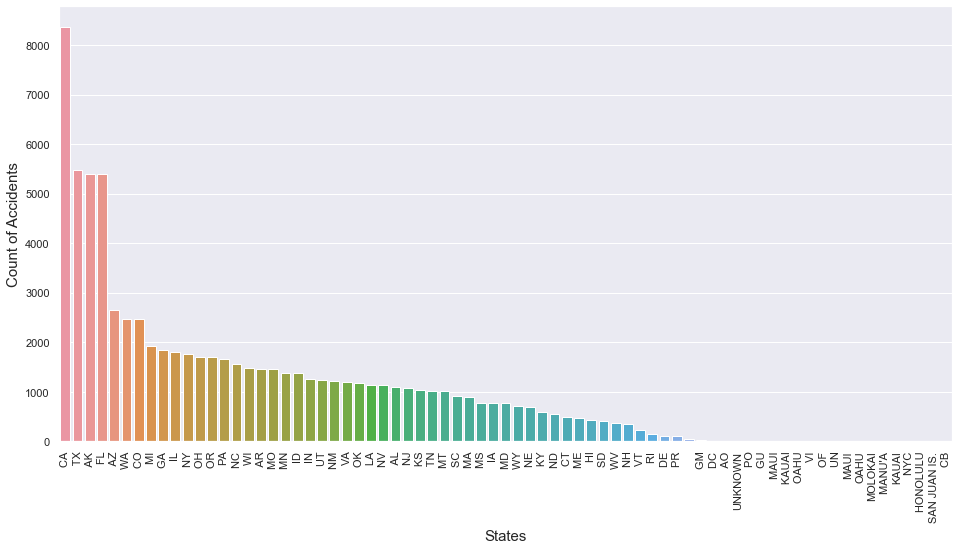

In [27]:
f = plt.figure(figsize=(16, 8))
sb.countplot(x='State', data=data2, order = data2['State'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("States", size=15)
plt.ylabel("Count of Accidents", size=15)

Base on the data shown, `California` has the most number of accidents happening.

## Weather

<AxesSubplot:xlabel='Month', ylabel='count'>

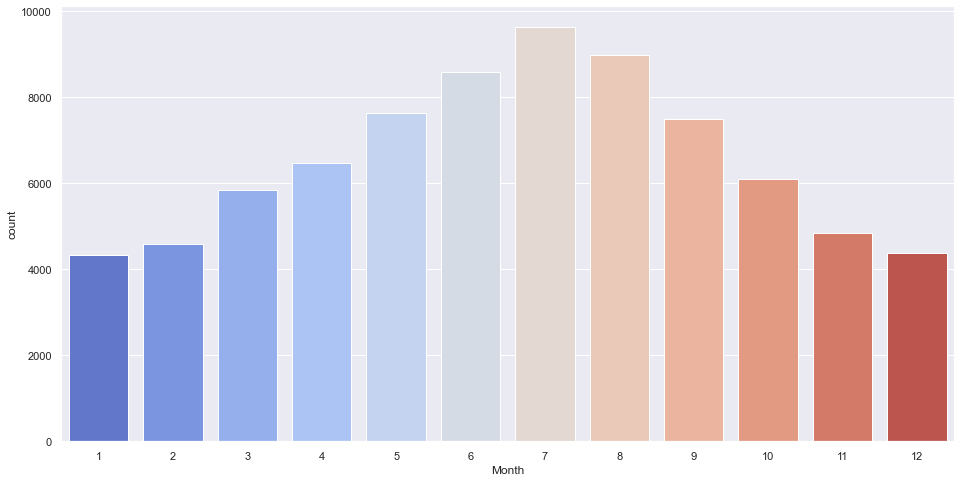

In [28]:
f = plt.figure(figsize=(16, 8))
sb.countplot(x='Month', data=data_clean, palette='coolwarm')

Spring runs from March 1 to May 31;
Summer runs from June 1 to August 31;
Fall (autumn) runs from September 1 to November 30; and.
Winter runs from December 1 to February 28

The highest points are in June, July and August. This is in correlation to the summer season when there are more flights during this period.

### Top 10 Company with Fatal accident

In [29]:
data_clean["Make"].value_counts().head(10)

CESSNA      25573
PIPER       14041
BEECH        4871
BELL         2337
MOONEY       1264
GRUMMAN      1139
BELLANCA     1017
ROBINSON     1004
BOEING        997
HUGHES        874
Name: Make, dtype: int64

In [30]:
data_company = data_clean.loc[data_clean['Make'].isin(['CESSNA', 'PIPER', 'BEECH', 'BELL', 'MOONEY',
                                                  'GRUMMAN', 'BELLANCA', 'BOEING', 'ROBINSON', 'HUGHES'])]

In [31]:
for col in data_company:
    if data_company[col].loc == 'object':
        data_company[col] = data_company[col].astype('category')
data_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53117 entries, 1 to 87281
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             53117 non-null  datetime64[ns]
 1   Location               53117 non-null  object        
 2   Country                53117 non-null  object        
 3   Make                   53117 non-null  object        
 4   Amateur.Built          53117 non-null  object        
 5   Number.of.Engines      53117 non-null  int64         
 6   Engine.Type            53117 non-null  object        
 7   Injury.Severity        53117 non-null  object        
 8   Total.Fatal.Injuries   53117 non-null  object        
 9   Weather.Condition      53117 non-null  object        
 10  Broad.phase.of.flight  53117 non-null  object        
 11  Investigation.Type     53117 non-null  object        
 12  Aircraft.Category      53117 non-null  object        
 13  C

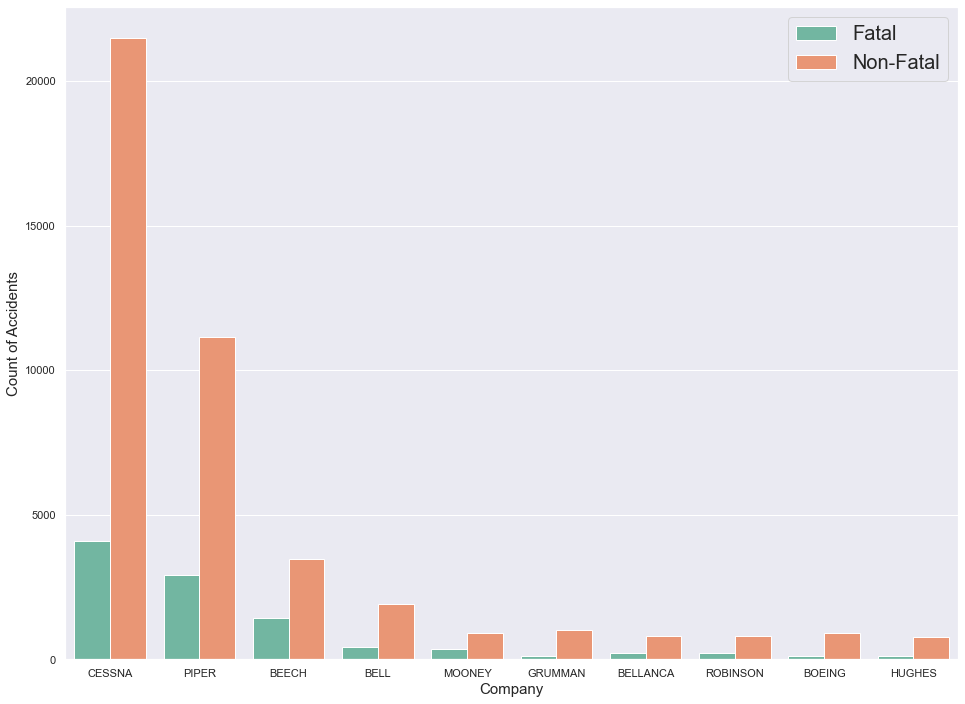

In [32]:
plt.figure(figsize=(16,12))
ax = sb.countplot(x="Make", hue="Injury.Severity", data=data_company, order = data_company['Make'].value_counts().index, palette="Set2")
plt.xlabel("Company", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.legend(loc= 'upper right', fontsize = '20', title_fontsize = "10")

`Cessna` company has both the highest fatal and non-fatal accidents.

## Number of engines

In [33]:
data_clean["Number.of.Engines"].value_counts()

1    67949
2     9248
0     1158
4      221
3      207
8        3
Name: Number.of.Engines, dtype: int64

Text(0, 0.5, 'Count of Accidents')

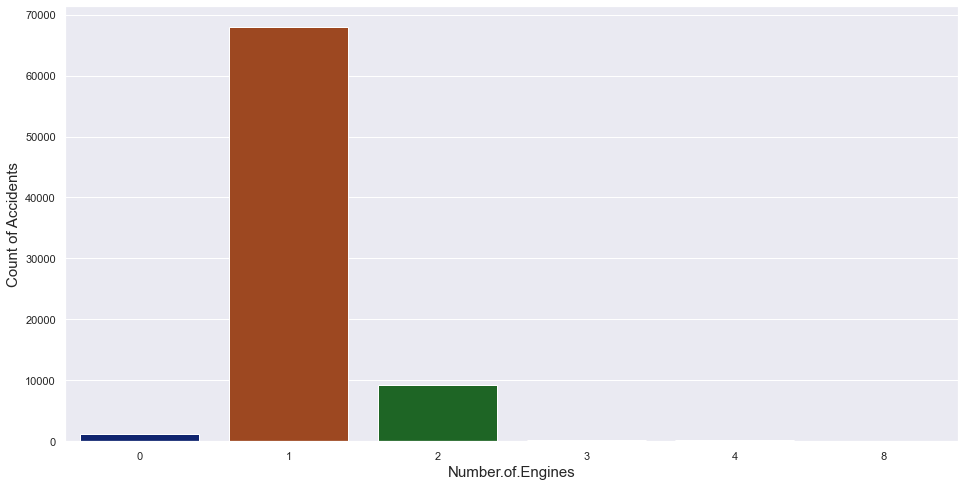

In [34]:
f = plt.figure(figsize=(16, 8))
sb.countplot(x='Number.of.Engines', data=data_clean, palette="dark" )
plt.xlabel("Number.of.Engines", size=15)
plt.ylabel("Count of Accidents", size=15)

## Board phrase of flight

Text(0, 0.5, 'Count of Accidents')

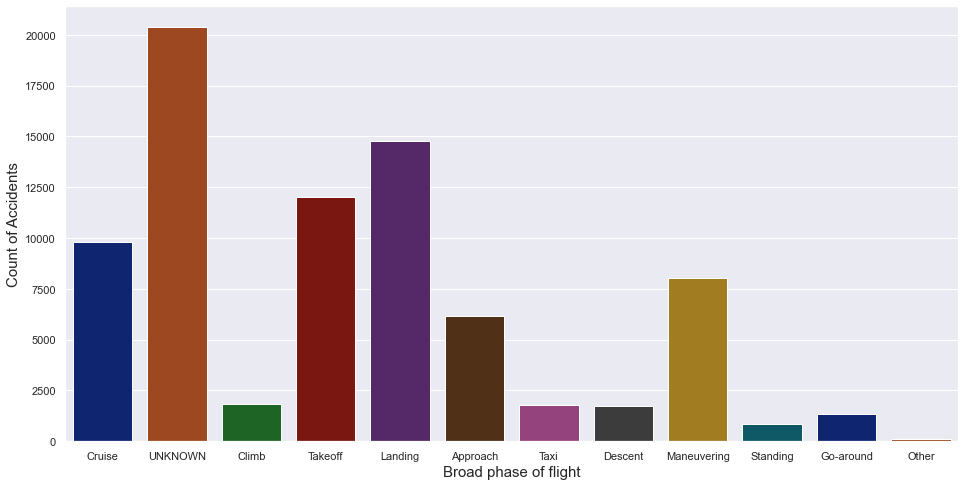

In [68]:
f = plt.figure(figsize=(16, 8))
sb.countplot(x='Broad.phase.of.flight', data=data_clean, palette="dark" )
plt.xlabel("Broad phase of flight", size=15)
plt.ylabel("Count of Accidents", size=15)

possible correlation:
    company/maker -done
    number of engine
    month -done
    weather
    amauter build
    
    engine type
    aircraft category
can use tree to do prediction  

cause of accident/ likely hood of death:
-weather
-number of engine
-maker/amauter built
-face of flight

## MACHINE LEARNING 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
ml = pd.DataFrame(data_company)
ml.info()
ml["Weather.Condition"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53117 entries, 1 to 87281
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             53117 non-null  datetime64[ns]
 1   Location               53117 non-null  object        
 2   Country                53117 non-null  object        
 3   Make                   53117 non-null  object        
 4   Amateur.Built          53117 non-null  object        
 5   Number.of.Engines      53117 non-null  int64         
 6   Engine.Type            53117 non-null  object        
 7   Injury.Severity        53117 non-null  object        
 8   Total.Fatal.Injuries   53117 non-null  object        
 9   Weather.Condition      53117 non-null  object        
 10  Broad.phase.of.flight  53117 non-null  object        
 11  Investigation.Type     53117 non-null  object        
 12  Aircraft.Category      53117 non-null  object        
 13  C

VMC        47565
IMC         4388
UNKNOWN     1164
Name: Weather.Condition, dtype: int64

In [37]:
ml['Weather.Condition'].replace('VMC', '1', inplace=True)
ml['Weather.Condition'].replace('IMC', '2', inplace=True)
ml['Weather.Condition'].replace('UNKNOWN', '0', inplace=True)
ml["Weather.Condition"].value_counts()

1    47565
2     4388
0     1164
Name: Weather.Condition, dtype: int64

In [38]:
ml.drop(ml.index[ml['Weather.Condition'] == '0'], inplace = True)
ml["Weather.Condition"].unique()

array(['2', '1'], dtype=object)

In [39]:
ml["Make"].value_counts()

CESSNA      25104
PIPER       13750
BEECH        4769
BELL         2280
MOONEY       1234
GRUMMAN      1128
BELLANCA     1008
ROBINSON      936
BOEING        887
HUGHES        857
Name: Make, dtype: int64

In [40]:
ml['Make'].replace('CESSNA', '1', inplace=True)
ml['Make'].replace('PIPER', '2', inplace=True)
ml['Make'].replace('BEECH', '3', inplace=True)
ml['Make'].replace('BELL', '3', inplace=True)
ml['Make'].replace('MOONEY', '3', inplace=True)
ml['Make'].replace('GRUMMAN', '3', inplace=True)
ml['Make'].replace('BELLANCA', '3', inplace=True)
ml['Make'].replace('BOEING', '3', inplace=True)
ml['Make'].replace('ROBINSON', '3', inplace=True)
ml['Make'].replace('HUGHES', '3', inplace=True)

In [41]:
ml['Number.of.Engines']= ml['Number.of.Engines'].astype('category')
ml['Weather.Condition']= ml['Weather.Condition'].astype('category')
ml['Make']= ml['Make'].astype('category')
ml['Month']= ml['Month'].astype('category')

In [42]:
y = pd.DataFrame(ml["Injury.Severity"])  # Predictor
X = pd.DataFrame(ml[["Number.of.Engines", "Weather.Condition","Make","Month"]])   # Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=30)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51953 entries, 2 to 87252
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Number.of.Engines  51953 non-null  category
 1   Weather.Condition  51953 non-null  category
 2   Make               51953 non-null  category
 3   Month              51953 non-null  category
dtypes: category(4)
memory usage: 609.7 KB


[Text(1395.0, 978.48, 'Weather.Condition <= 1.5\ngini = 0.293\nsamples = 41562\nvalue = [7421, 34141]\nclass = Non-Fatal'),
 Text(697.5, 761.0400000000001, 'Number.of.Engines <= 1.5\ngini = 0.238\nsamples = 38039\nvalue = [5262, 32777]\nclass = Non-Fatal'),
 Text(348.75, 543.6, 'Make <= 1.5\ngini = 0.223\nsamples = 33879\nvalue = [4326, 29553]\nclass = Non-Fatal'),
 Text(174.375, 326.1600000000001, 'Month <= 7.5\ngini = 0.191\nsamples = 17347\nvalue = [1850, 15497]\nclass = Non-Fatal'),
 Text(87.1875, 108.72000000000003, 'gini = 0.178\nsamples = 10464\nvalue = [1035, 9429]\nclass = Non-Fatal'),
 Text(261.5625, 108.72000000000003, 'gini = 0.209\nsamples = 6883\nvalue = [815, 6068]\nclass = Non-Fatal'),
 Text(523.125, 326.1600000000001, 'Month <= 9.5\ngini = 0.255\nsamples = 16532\nvalue = [2476, 14056]\nclass = Non-Fatal'),
 Text(435.9375, 108.72000000000003, 'gini = 0.246\nsamples = 13509\nvalue = [1941, 11568]\nclass = Non-Fatal'),
 Text(610.3125, 108.72000000000003, 'gini = 0.291\nsa

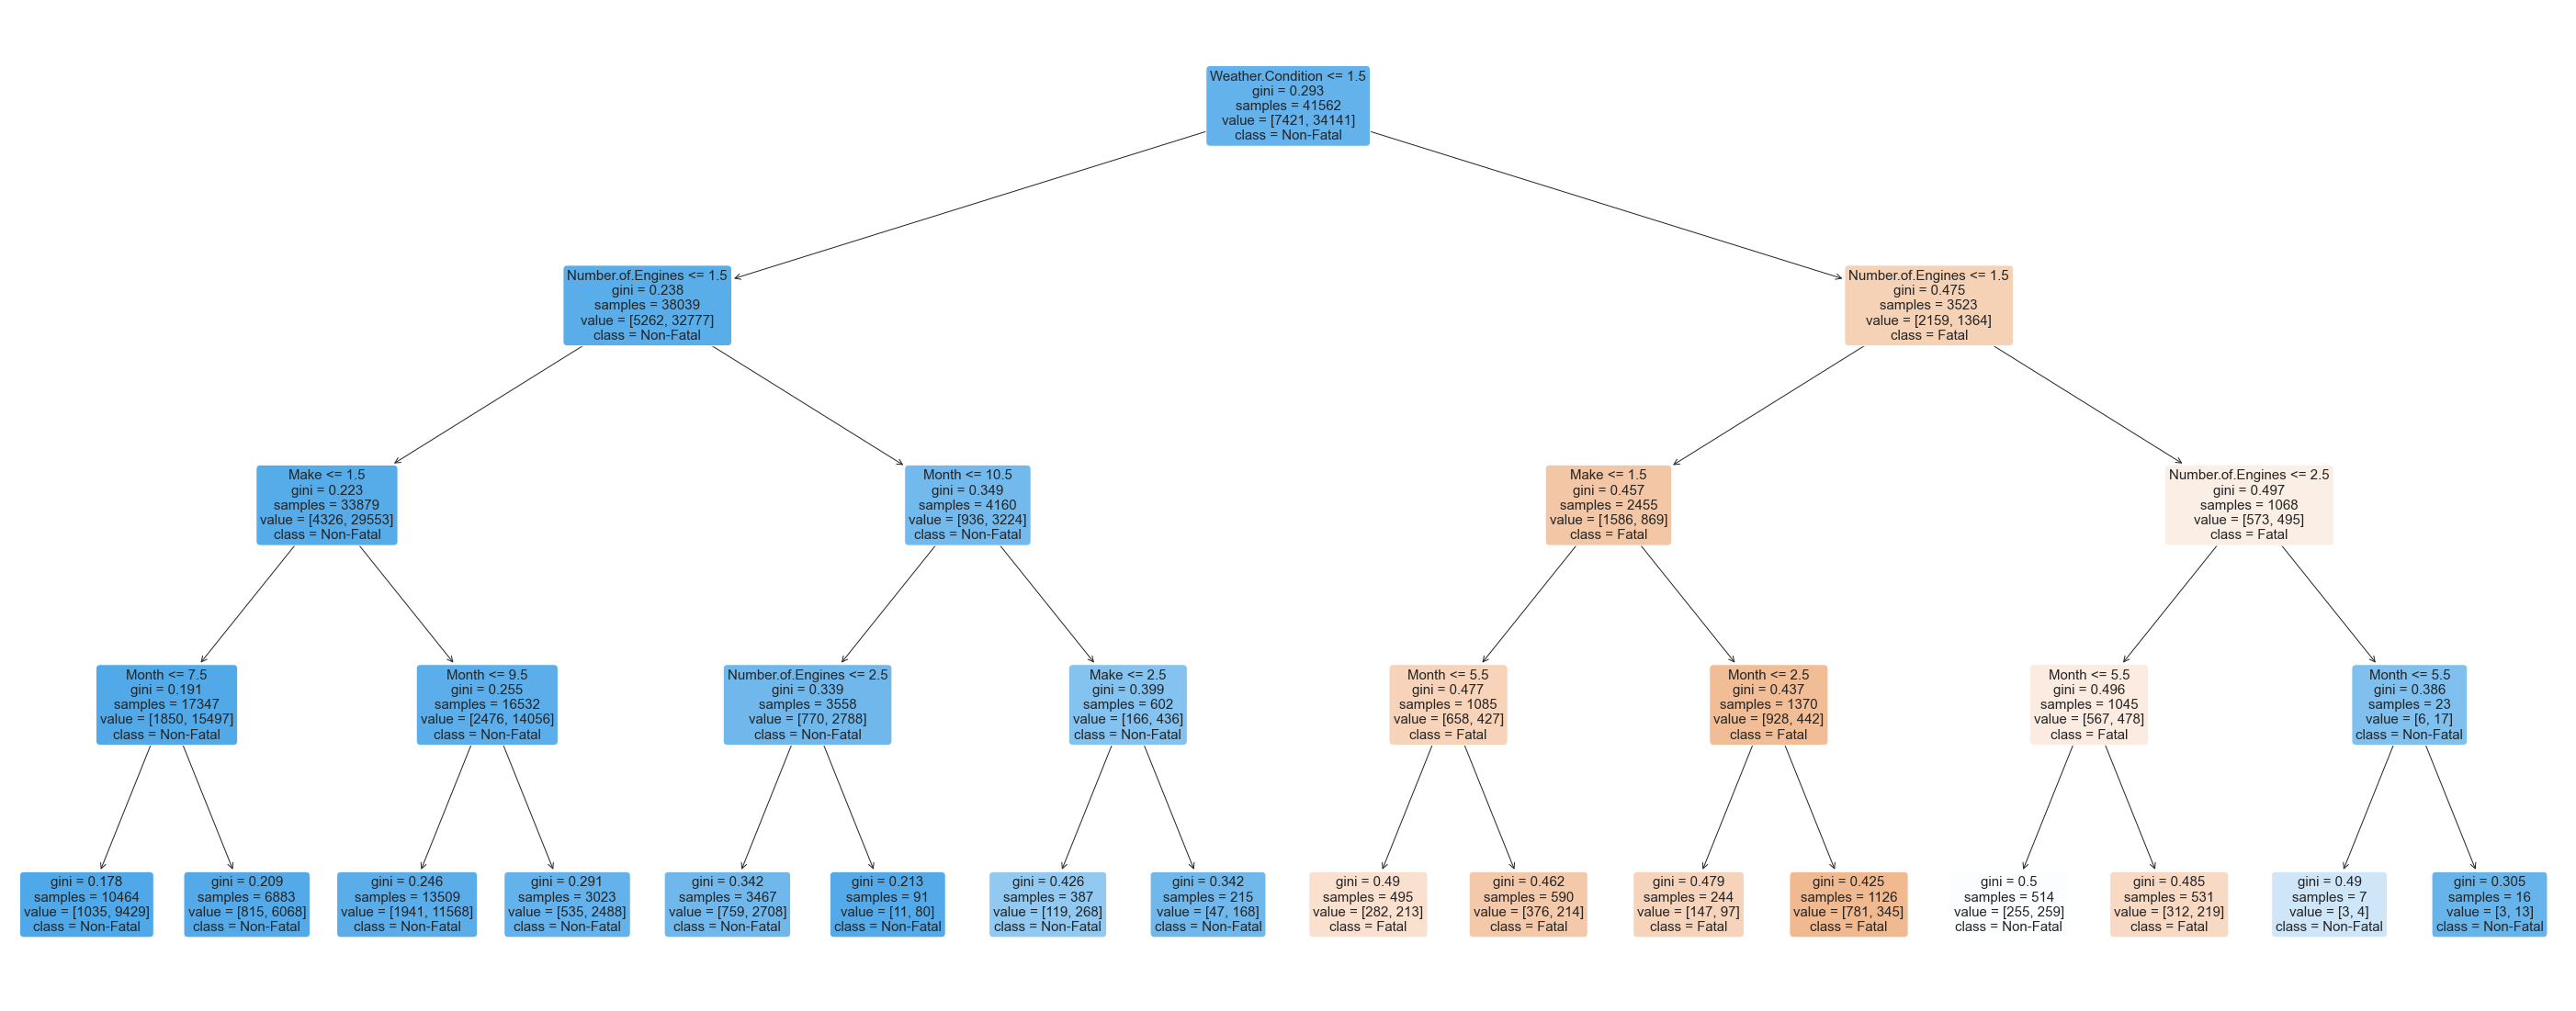

In [43]:
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

f = plt.figure(figsize=(50,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Fatal","Non-Fatal"],
          fontsize=15)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8409364323179828

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.837840438841305

Train Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : 
The TPR : [0.25576068 0.96813216]
The FPR : [0.03186784 0.74423932]

Test Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : 
The TPR : [0.25265393 0.96743858]
The FPR : [0.03256142 0.74734607]



<AxesSubplot:>

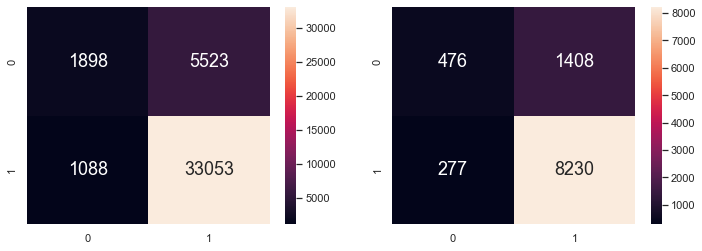

In [44]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
TP = np.diag(cnf_matrix_train)
FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
print("Train Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : ")
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print("The TPR :", TPR)
print("The FPR :", FPR)
print()

cnf_matrix_test = confusion_matrix(y_test, y_test_pred)
TP1 = np.diag(cnf_matrix_test)
FP1 = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN1 = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TN1 = cnf_matrix_test.sum() - (FP1 + FN1 + TP1)

FP1 = FP1.astype(float)
FN1 = FN1.astype(float)
TP1 = TP1.astype(float)
TN1 = TN1.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
print("Test Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : ")
TPR1 = TP1/(TP1+FN1)
FPR1 = FP1/(FP1+TN1)
print("The TPR :", TPR1)
print("The FPR :", FPR1)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Random forest

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [46]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [47]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [48]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\Weiquan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 19s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
grid_search.best_score_

0.8413456076272416

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=200, n_estimators=50,
                       n_jobs=-1, random_state=42)

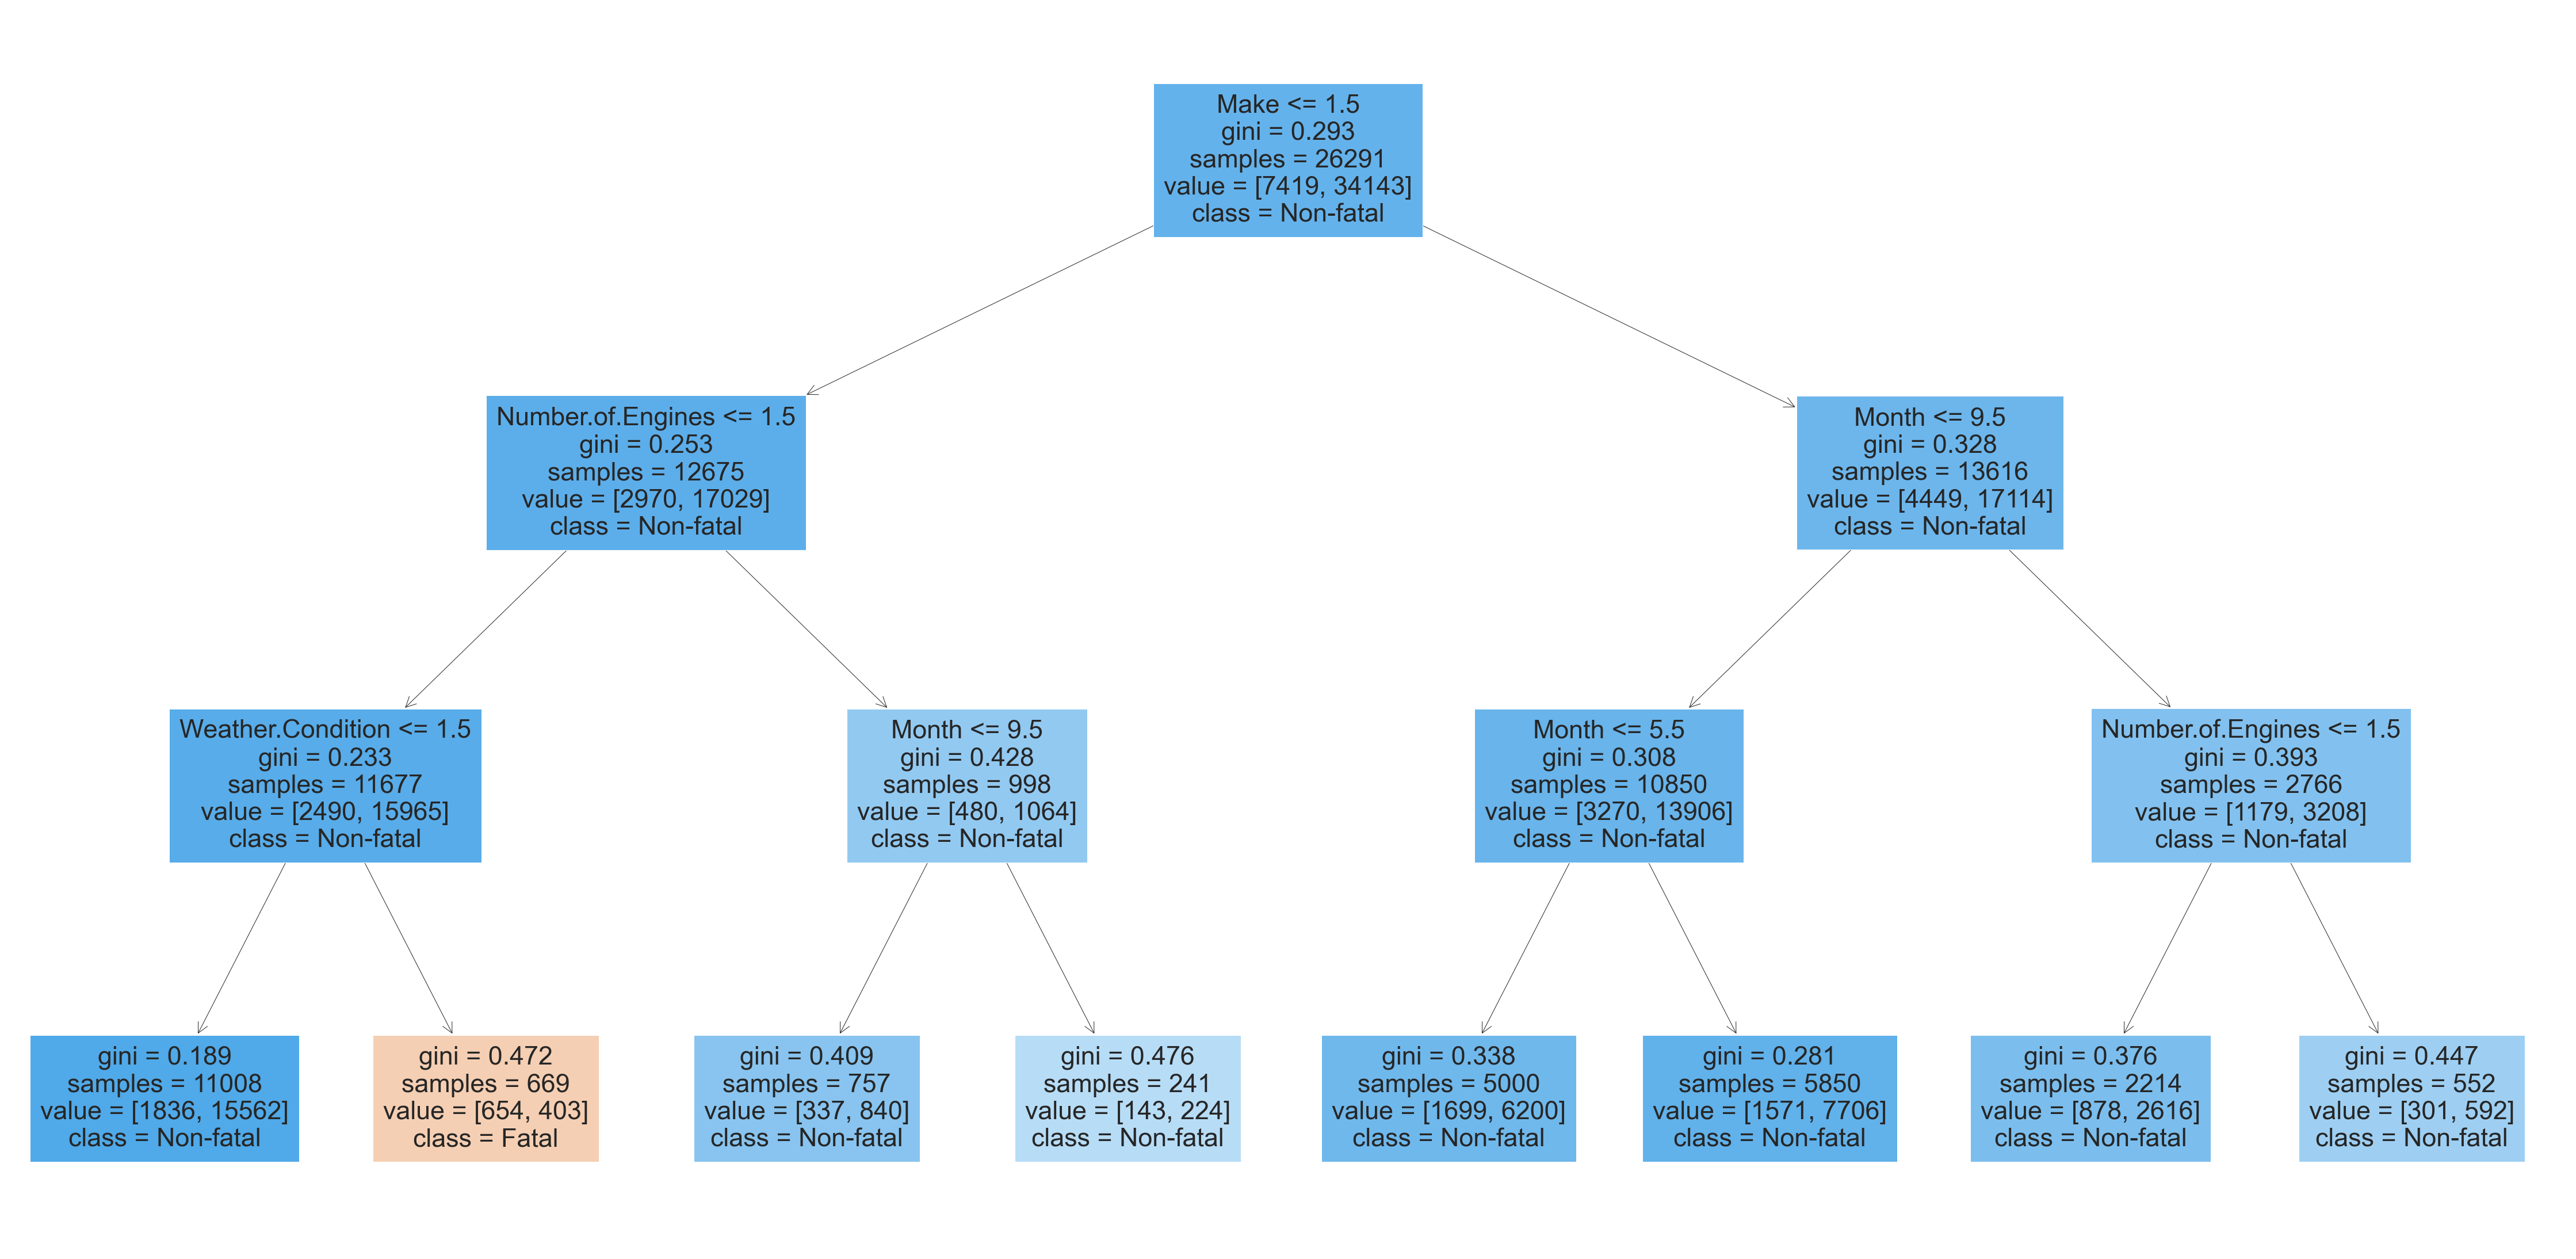

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns ,class_names=['Fatal', "Non-fatal"],filled=True);

In [52]:
rf_best.fit(X_train,y_train)

C:\Users\Weiquan\AppData\Local\Temp/ipykernel_28440/1322216838.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=200, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [53]:
predictions = rf_best.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Fatal       0.63      0.26      0.37      1884
   Non-Fatal       0.86      0.97      0.91      8507

    accuracy                           0.84     10391
   macro avg       0.74      0.61      0.64     10391
weighted avg       0.81      0.84      0.81     10391



In [55]:
print(confusion_matrix(y_test,predictions))

[[ 494 1390]
 [ 293 8214]]


In [56]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Weather.Condition,0.849349
0,Number.of.Engines,0.091880
2,Make,0.034458
3,Month,0.024313


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8410807949569318

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8380329130978732

Train Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : 
The TPR : [0.25576068 0.96813216]
The FPR : [0.03186784 0.74423932]

Test Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : 
The TPR : [0.25265393 0.96743858]
The FPR : [0.03256142 0.74734607]



<AxesSubplot:>

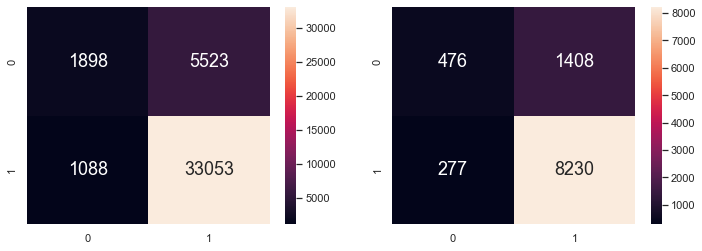

In [58]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_best.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_best.score(X_test, y_test))
print()

cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
TP = np.diag(cnf_matrix_train)
FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
print("Train Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : ")
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print("The TPR :", TPR)
print("The FPR :", FPR)
print()

cnf_matrix_test = confusion_matrix(y_test, y_test_pred)
TP1 = np.diag(cnf_matrix_test)
FP1 = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN1 = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TN1 = cnf_matrix_test.sum() - (FP1 + FN1 + TP1)

FP1 = FP1.astype(float)
FN1 = FN1.astype(float)
TP1 = TP1.astype(float)
TN1 = TN1.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
print("Test Dataset - TPR (True Positive Rate) and FPR (False Positive Rate) : ")
TPR1 = TP1/(TP1+FN1)
FPR1 = FP1/(FP1+TN1)
print("The TPR :", TPR1)
print("The FPR :", FPR1)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [64]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel() 
(tn, fp, fn, tp) 
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt 

fp = fp.astype(float)
fn = fn.astype(float)
tp = tp.astype(float)
tn = tn.astype(float)
 
disp = plot_confusion_matrix(y_train, y_train_pred, 
                                 cmap=plt.cm.Blues, 
                                 normalize='true')

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict
 
forest_clf = RandomForestClassifier(random_state=42) 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba') 
y_scores_forest = y_probas_forest[:,1] 
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train,y_scores_forest) 
 
forest_clf.fit(X_train,y_train) 
y_pred = forest_clf.predict(X_train) 
 
 
# f1 score 
 
f1_score(y_train, y_pred) 
 
# confusion matrix 
 
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt 
 
disp = plot_confusion_matrix(forest_clf, X_train, y_train, 
                                 cmap=plt.cm.Blues, 
                                 normalize='true')

C:\Users\Weiquan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:960: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Weiquan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:999: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '


IndexError: index 1 is out of bounds for axis 1 with size 1